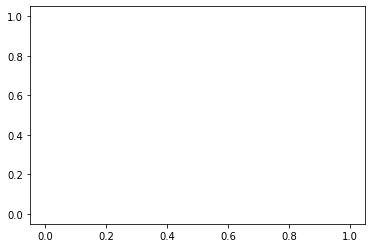

['dump_hh_ca1.p', 'dump_hh_ncl5.p', 'dump_hh_olf.p', 'dump_hh_purk.p']


In [1]:
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

import matplotlib.pyplot as plt
plt.plot()
plt.show()

import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)
import pickle
import glob
import os
from neuronunit.optimisation.optimization_management import check_binary_match, which_key
from neuronunit.optimisation.optimization_management import check_match_front, inject_and_not_plot_model
from neuronunit.capabilities.spike_functions import get_spike_waveforms#check_match_front, inject_and_not_plot_model
import os
import pickle
from neuronunit.optimisation.optimization_management import TSD

izhi_files = glob.glob('*izhi*.p')
hh_files = sorted(glob.glob('*hh*.p'))
all_files = sorted(glob.glob('*.p'))
blah = sorted(all_files)
#blah
print(hh_files)


In [2]:


cells = pickle.load(open("processed_multicellular_constraints.p","rb"))

purk = TSD(cells['Cerebellum Purkinje cell'])#.tests
purk_vr = purk["RestingPotentialTest"].observation['mean']

ncl5 = TSD(cells["Neocortex pyramidal cell layer 5-6"])
ncl5.name = str("Neocortex pyramidal cell layer 5-6")
ncl5_vr = ncl5["RestingPotentialTest"].observation['mean']

ca1 = TSD(cells['Hippocampus CA1 pyramidal cell'])
ca1_vr = ca1["RestingPotentialTest"].observation['mean']
rt = pickle.load(open("contains_mitral.p","rb"))
olf = TSD(rt[1]['olf_mit'])
olf_vr = olf["RestingPotentialTest"].observation['mean']
olf.use_rheobase_score = False

cells.pop('Olfactory bulb (main) mitral cell',None)


rt = pickle.load(open("contains_mitral.p","rb"))
#olf = TSD(rt[1]['olf_mit'])
#rt[1]['olf_mit']


In [3]:
cells['olf_mit'] = rt[1]['olf_mit']


In [4]:
list_of_dicts = []
for k,v in cells.items():
    observations = {}
    for k1 in ca1.keys():
        vsd = TSD(v)
        if k1 in vsd.keys():
            vsd[k1].observation['mean']
            observations[k1] = vsd[k1].observation['mean']
            observations['name'] = k
    list_of_dicts.append(observations)
df = pd.DataFrame(list_of_dicts)
df
df = df.set_index('name').T


In [5]:


s = df.style.background_gradient(cmap=cm)
s

name,Hippocampus CA1 pyramidal cell,Cerebellum Purkinje cell,Neocortex pyramidal cell layer 5-6,olf_mit
RheobaseTest,189.24 pA,680.794444444444 pA,213.849583333333 pA,nan
InputResistanceTest,107.080327644332 Mohm,142.057692307692 Mohm,120.672073643411 Mohm,130.083333333333 Mohm
TimeConstantTest,24.5021946169772 ms,nan,15.7342424242424 ms,24.4833333333333 ms
CapacitanceTest,89.7960714285714 pF,620.2725 pF,150.584166666667 pF,235.75 pF
RestingPotentialTest,-65.2261863636364 mV,-61.5916666666667 mV,-68.2481434599156 mV,-58.140625 mV
InjectedCurrentAPWidthTest,1.31895278450363 ms,0.41412962962963 ms,1.20769387755102 ms,1.61 ms
InjectedCurrentAPAmplitudeTest,86.364525297619 mV,71.2308333333333 mV,80.4351020408164 mV,68.4 mV
InjectedCurrentAPThresholdTest,-47.5985714285714 mV,-46.8947619047619 mV,-42.7357232704403 mV,-38.9 mV


In [6]:
from deap import creator, base, tools
import array
toolbox = base.Toolbox()



creator.create("FitnessMin", base.Fitness, weights=tuple(-1.0 for i in range(0,8)))
creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMin)
toolbox.register("population", tools.initRepeat, list, creator.Individual)
list_out = pickle.load(open('dump_neuron_olf.p','rb'))
neuron_olf = list_out[1][0].dtc

neuron_olf.SA
neuron_olf.get_agreement()
neuron_olf.agreement
neuron_olf.SA
neuron_olf.agreement    
neuron_olf.name = 'olf_mit'

In [7]:
models_hh=[]
for f in hh_files:
    model = pickle.load(open(f,'rb'))
    print(f)
    try:
        model.name = f
        models_hh.append(model)
    except:
        pass
models_hh_r = models_hh[::-1]
for m in models_hh_r:
    print(m.name)
    

models_hh_r.append(neuron_olf)

models_hh.append(neuron_olf)

dump_hh_ca1.p
dump_hh_ncl5.p
dump_hh_olf.p
dump_hh_purk.p
dump_hh_purk.p
dump_hh_ncl5.p
dump_hh_ca1.p


In [8]:
from sciunit.scores import ZScore
from scipy.stats import norm
import numpy as np


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math


dtc = neuron_olf

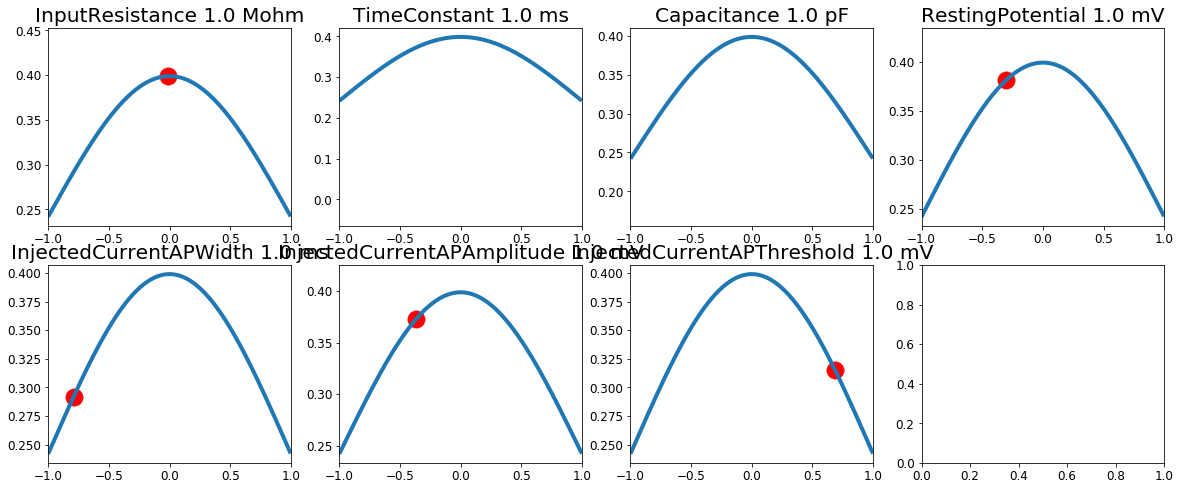

In [18]:

fig,axes = plt.subplots(2,math.ceil(len(dtc.tests)/2),figsize=(20,8))
plt.style.use('fivethirtyeight')

#axes[0,0].plot(scores)
axes[0,0].set_title('Optimized model position relative to data')

for i,t in enumerate(dtc.tests):

    t.score_type = ZScore
    model = dtc.dtc_to_model()
    score = t.judge(model)
    x1 = -1.01
    x2 = 1.0
    sigma = 1.0
    mu = 0
    x = np.arange(-sigma, sigma, 0.001) # range of x in spec
    x_all = np.arange(-sigma, sigma, 0.001) 
    y_point = norm.pdf(mu+float(score.raw),0,1)
    y2 = norm.pdf(x_all,0,1)

    y = norm.pdf(x,0,1)
    y2 = norm.pdf(x_all,0,1)

    ax = axes.flat[i]

    x_point = mu+float(score.raw)

    ax.scatter(x_point,y_point,c='r',s=300,marker='o')
    name = t.name.split('Test')[0]

    ax.set_title(str(name)+str(' ')+str(t.observation['mean'].units))
    ax.plot(x_all,y2)
    ax.set_xlim([-1.0,1.0])
plt.show()



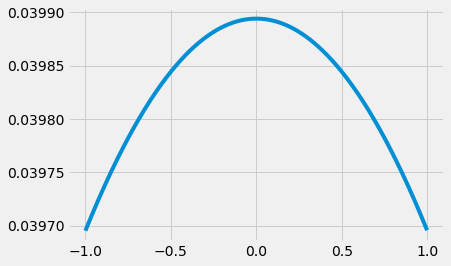

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-1, 1, 0.001)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,0,10))
plt.show()

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

def z_val(sig_level=0.05, two_tailed=True):
    """Returns the z value for a given significance level"""
    z_dist = scs.norm()
    if two_tailed:
        sig_level = sig_level/2
        area = 1 - sig_level
    else:
        area = 1 - sig_level

    z = z_dist.ppf(area)

    return z
  
  
def zplot(x_point,y_point,area=0.95, two_tailed=True, align_right=False):
    """Plots a z distribution with common annotations
    Example:
        zplot(area=0.95)
        zplot(area=0.80, two_tailed=False, align_right=True)
    Parameters:
        area (float): The area under the standard normal distribution curve.
        align (str): The area under the curve can be aligned to the center
            (default) or to the left.
    Returns:
        None: A plot of the normal distribution with annotations showing the
        area under the curve and the boundaries of the area.
    """
    # create plot object
    fig = plt.figure(figsize=(12, 6))
    ax = fig.subplots()
    # create normal distribution
    norm = scs.norm()
    # create data points to plot
    x = np.linspace(-5, 5, 1000)
    y = norm.pdf(x)

    ax.plot(x, y)
    ax.scatter(x_point,y_point,c='r',s=300,marker='o')

    # code to fill areas for two-tailed tests
    if two_tailed:
        left = norm.ppf(0.5 - area / 2)
        right = norm.ppf(0.5 + area / 2)
        ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
        ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')

        ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                        where=(x > left) & (x < right))
        plt.xlabel('z')
        plt.ylabel('PDF')
        plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left), fontsize=12,
                 rotation=90, va="bottom", ha="right")
        plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                 fontsize=12, rotation=90, va="bottom", ha="left")
    # for one-tailed tests
    else:
        # align the area to the right
        if align_right:
            left = norm.ppf(1-area)
            ax.vlines(left, 0, norm.pdf(left), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                            where=x > left)
            plt.text(left, norm.pdf(left), "z = {0:.3f}".format(left),
                     fontsize=12, rotation=90, va="bottom", ha="right")
        # align the area to the left
        else:
            right = norm.ppf(area)
            ax.vlines(right, 0, norm.pdf(right), color='grey', linestyle='--')
            ax.fill_between(x, 0, y, color='grey', alpha='0.25',
                            where=x < right)
            plt.text(right, norm.pdf(right), "z = {0:.3f}".format(right),
                     fontsize=12, rotation=90, va="bottom", ha="left")

    # annotate the shaded area
    plt.text(0, 0.1, "shaded area = {0:.3f}".format(area), fontsize=12,
             ha='center')
    # axis labels
    plt.xlabel('z')
    plt.ylabel('PDF')
    

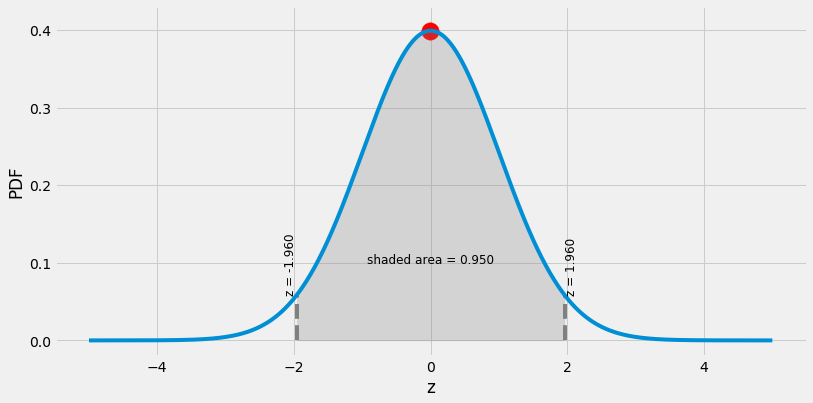

In [21]:


for i,t in enumerate(dtc.tests):

    t.score_type = ZScore
    model = dtc.dtc_to_model()
    score = t.judge(model)
    x1 = -1.01
    x2 = 1.0
    sigma = 1.0
    mu = 0
    x = np.arange(-sigma, sigma, 0.001) # range of x in spec
    x_all = np.arange(-sigma, sigma, 0.001) 
    y_point = norm.pdf(mu+float(score.raw),0,1)
    y2 = norm.pdf(x_all,0,1)

    y = norm.pdf(x,0,1)
    y2 = norm.pdf(x_all,0,1)

    ax = axes.flat[i]

    x_point = mu+float(score.raw)
    zplot(x_point,y_point)
    break
    
    ax.scatter(x_point,y_point,c='r',s=300,marker='o')
    name = t.name.split('Test')[0]

    ax.set_title(str(name)+str(' ')+str(t.observation['mean'].units))
    ax.plot(x_all,y2)
    ax.set_xlim([-1.0,1.0])
    
#plt.show()


In [22]:
for i,t in enumerate(dtc.tests):
    print(t.name)

InputResistanceTest
TimeConstantTest
CapacitanceTest
RestingPotentialTest
InjectedCurrentAPWidthTest
InjectedCurrentAPAmplitudeTest
InjectedCurrentAPThresholdTest


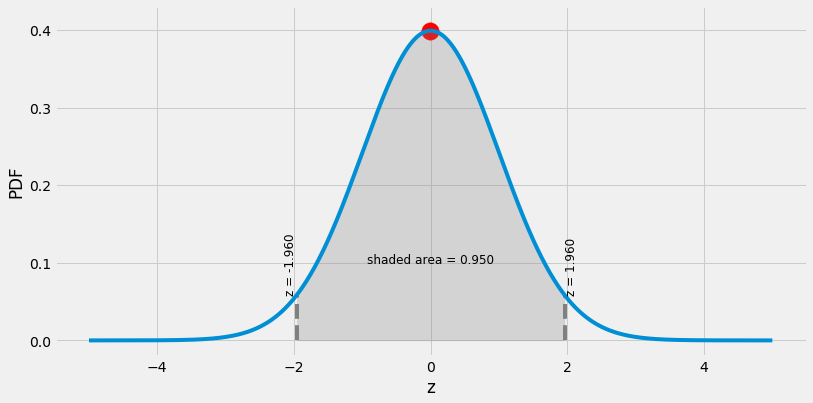

In [23]:
zplot(x_point,y_point)


In [24]:

    
list_of_dics = []    
for m in models_hh_r:
    name = str(m.name)
    try:
        name = name.split('dump_')[1]
    except:
        name = name
    m.SA['name'] = name
    temp = {str(k):v for k,v in m.SA.items()}
    list_of_dics.append(temp)
df_scores = pd.DataFrame(list_of_dics)
df_scores
df_scores = df_scores.set_index('name').T
df_scores

name,hh_purk.p,hh_ncl5.p,hh_ca1.p,olf_mit
RheobaseTest,0.171144,0.013724,0.021440,NaN
InputResistanceTest,2.636853,0.163329,0.106515,0.006776
CapacitanceTest,0.858756,0.942513,1.375809,1.349827
RestingPotentialTest,0.941725,2.393055,3.138426,0.269633
InjectedCurrentAPWidthTest,10.839414,0.026177,0.510742,0.845069
InjectedCurrentAPAmplitudeTest,0.402958,0.120169,0.361698,0.338681
InjectedCurrentAPThresholdTest,5.188337,0.556735,0.046858,0.706340
TimeConstantTest,NaN,2.441462,1.126024,7.208946


In [25]:
models_izhi=[]
for f in izhi_files:
    model = pickle.load(open(f,'rb'))
    model.name = f
    #print(f)
    models_izhi.append(model)
    
for m in models_izhi:
    print(m.name)    
    
list_of_dics = []    
for m in models_izhi:
    name = str(m.name)
    try:
        name = name.split('dump_')[1]
    except:
        name = name
    m.SA['name'] = name
    temp = {str(k):v for k,v in m.SA.items()}
    list_of_dics.append(temp)
df_scores = pd.DataFrame(list_of_dics)
df_scores
df_scores = df_scores.set_index('name').T
df_scores

dump_izhi_olf.p
dump_izhi_purk.p
dump_izhi_ncl5.p
dump_izhi_ca1.p


name,izhi_olf.p,izhi_purk.p,izhi_ncl5.p,izhi_ca1.p
InputResistanceTest,0.132746,2.748503,1.718078,1.138536
TimeConstantTest,3.826866,NaN,150.400000,0.639640
CapacitanceTest,314.900000,1.440759,484.600000,14.995696
RestingPotentialTest,1.264721,1.048772,0.382416,1.098448
InjectedCurrentAPWidthTest,11.656611,10.257634,2.782505,22.134009
InjectedCurrentAPAmplitudeTest,0.045538,2.997633,0.333192,25.964953
InjectedCurrentAPThresholdTest,2.061006,19.686987,12.566309,0.197698
RheobaseTest,NaN,0.189228,0.038513,0.000132


4 4


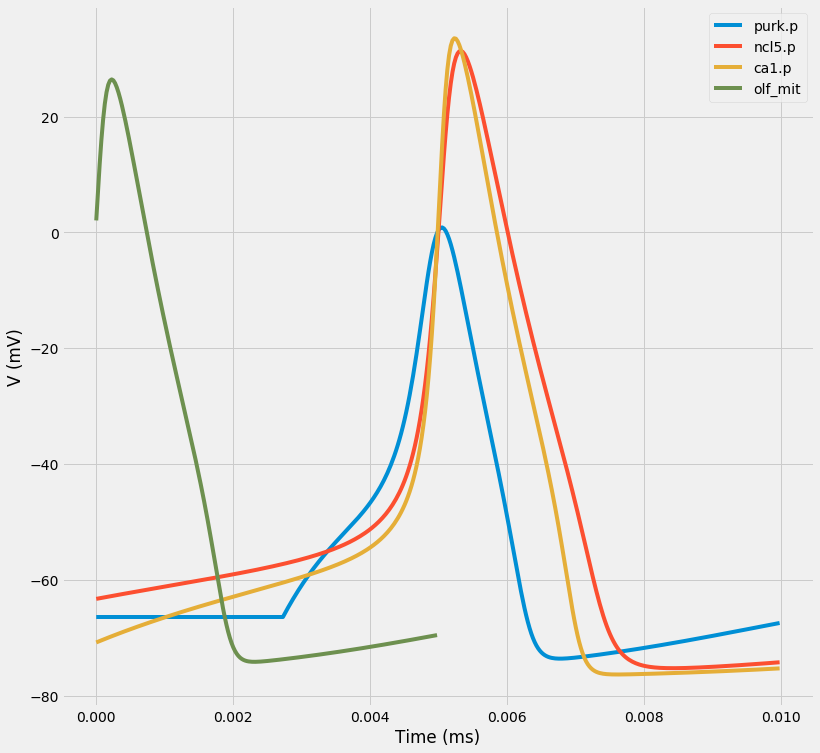

In [26]:
from neuronunit.optimisation.optimization_management import check_match_front, inject_and_not_plot_model
from neuronunit.capabilities.spike_functions import get_spike_waveforms#check_match_front, inject_and_not_plot_model

vms_hh = []
for dtc in models_hh_r:
    vms_hh.append(get_spike_waveforms(inject_and_not_plot_model(dtc)))

from matplotlib.pyplot import figure
#figure(num=None, figsize=(50, 50), dpi=80)#, facecolor='w', edgecolor='k')
plt.figure(figsize=(12, 12))
print(len(vms_hh),len(models_hh))
for v,f in zip(vms_hh,models_hh_r):
    name = str(f.name)
    try:
        name2 = name.split('dump_hh_')[1]
    except:
        name2 = name
    plt.plot(v.times, v.magnitude,label=name2)
plt.xlabel('Time (ms)')

plt.ylabel('V (mV)')
plt.legend(loc="upper left")

plt.legend()
plt.show()

4 4


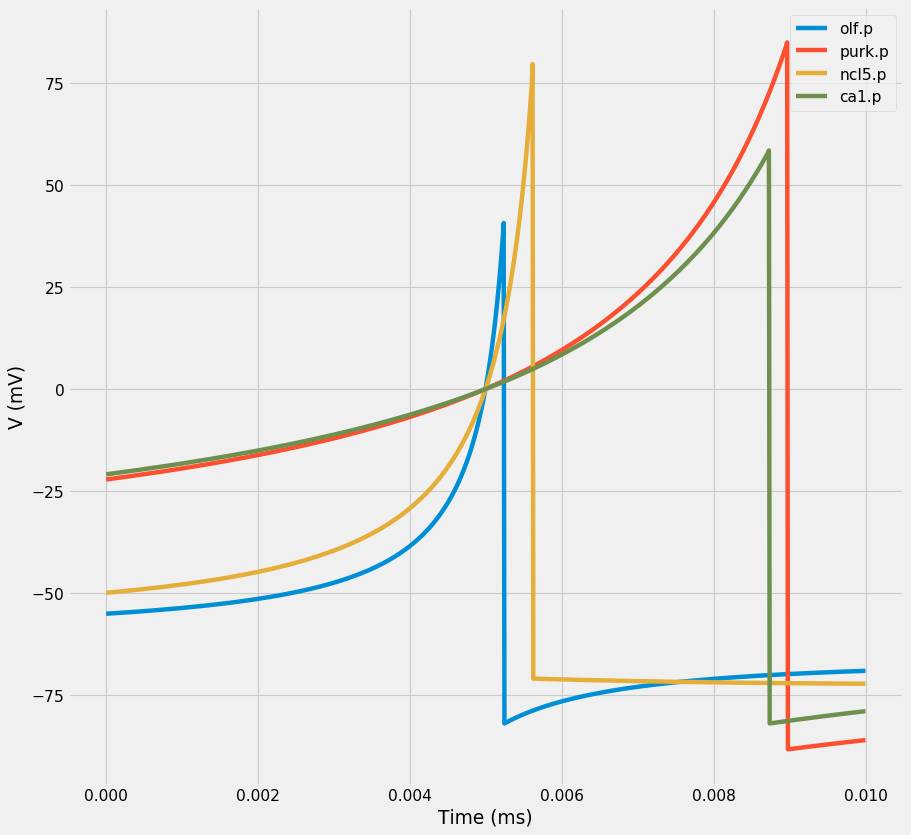

In [27]:

vms_izhi = []
for dtc in models_izhi:
    dtc.backend = "IZHI"
    vms_izhi.append(get_spike_waveforms(inject_and_not_plot_model(dtc)))

plt.figure(figsize=(12, 12), dpi=80)
print(len(vms_izhi),len(models_izhi))
#figure(num=None, figsize=(125, 125), dpi=80, facecolor='w', edgecolor='k')

for v,f in zip(vms_izhi,models_izhi):
    name = str(f.name)
    try:
        name2 = name.split('dump_izhi_')[1]
    except:
        name2 = name
    plt.plot(v.times, v.magnitude,label=name2)

plt.xlabel('Time (ms)')

plt.ylabel('V (mV)')
plt.legend(loc="upper left")

plt.legend()
plt.show()

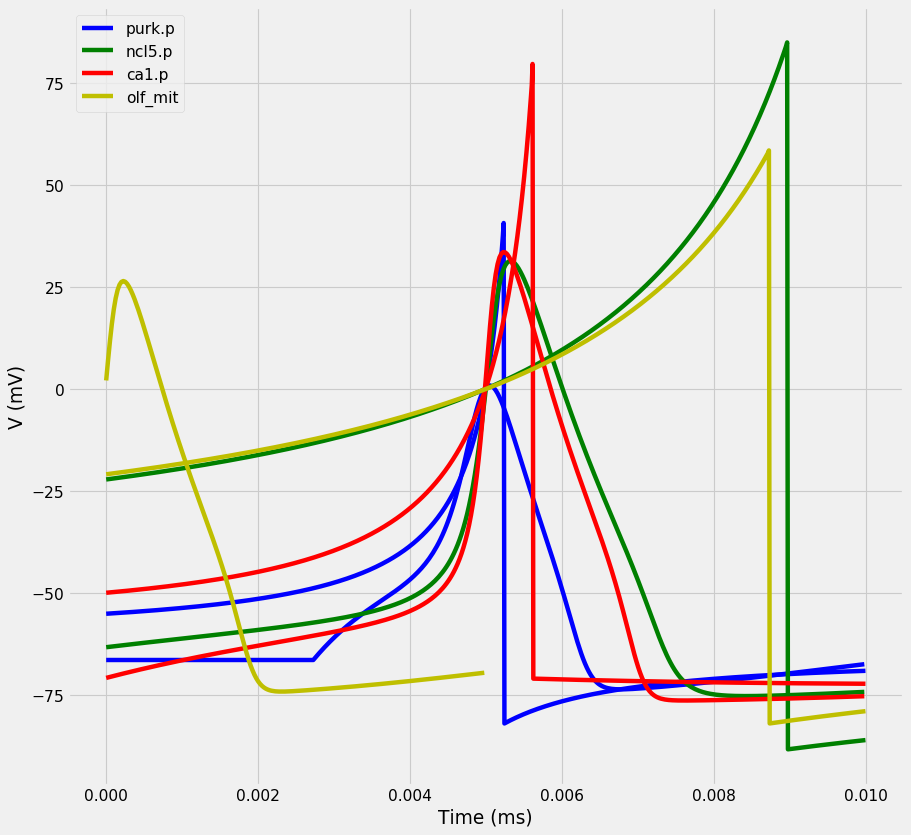

In [31]:
plt.figure(figsize=(12, 12), dpi=80)
colors = ['b','g','r','y']
cnt = 0
for v0,f0,v1,f1 in zip(vms_hh,models_hh_r,vms_izhi,models_izhi):
    name = str(f0.name)
    try:
        name2 = name.split('dump_hh_')[1]
    except:
        name2 = name
    plt.plot(v0.times, v0.magnitude,label=name2,c=colors[cnt])
    plt.plot(v1.times, v1.magnitude,c=colors[cnt])

    plt.xlabel('Time (ms)')

    plt.ylabel('V (mV)')
    plt.legend(loc="upper left")

    plt.legend()
    plt.show()
    cnt+=1

In [38]:
import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)
#pd.set_option("max_colwidth", None)


for f0,f1 in zip(models_hh_r,models_izhi):
    name2 = str(f0.name)
    try:
        name2 = name2.split('dump_')[1]
    except:
        name2 = name
        
    display(pd.DataFrame([{'test type':name2,'model type':f0.backend}]))    
    f0.get_agreement()
    df = f0.agreement
    df = df.round(2)
    display(df.round(2).T)
    display(pd.DataFrame([{'test type':name2,'model type':f1.backend}]))    
    f1.get_agreement()
    df = f1.agreement
    df = df.round(2)
    display(df.round(2).T)

,test type,model type
0,hh_purk.p,NEURONHH


,observations,predictions,scores
RheobaseTest,680.794444444444 pA,590.625 pA,0.171144
InputResistanceTest,142.057692307692 Mohm,17.778096702784293 Mohm,2.63685
CapacitanceTest,620.2725 pF,386.3402748737479 pF,0.992492
RestingPotentialTest,-61.5916666666667 mV,-66.43458168184866 mV,0.941725
InjectedCurrentAPWidthTest,0.41412962962963 ms,1.2249999999999999 ms,10.8394
InjectedCurrentAPAmplitudeTest,71.2308333333333 mV,67.01844180217199 mV,0.402958
InjectedCurrentAPThresholdTest,-46.8947619047619 mV,-66.15860976550252 mV,5.18834
total,NaN,NaN,64.26


,test type,model type
0,hh_purk.p,IZHI


,observations,predictions,scores
InputResistanceTest,130.083333333333 Mohm,118.10403015874441 Mohm,0.132746
TimeConstantTest,24.4833333333333 ms,3.667177241609951 ms,3.82687
CapacitanceTest,235.75 pF,31.05039884482242 pF,314.9
RestingPotentialTest,-58.140625 mV,-63.50917018024239 mV,1.26472
InjectedCurrentAPWidthTest,1.61 ms,0.19 ms,11.6273
InjectedCurrentAPAmplitudeTest,68.4 mV,68.85425638383198 mV,0.0764415
InjectedCurrentAPThresholdTest,-38.9 mV,-28.197700295122246 mV,1.87452
total,NaN,NaN,1640.36


,test type,model type
0,hh_ncl5.p,NEURONHH


,observations,predictions,scores
RheobaseTest,213.849583333333 pA,210.9375 pA,0.0137245
InputResistanceTest,120.672073643411 Mohm,105.92202423443096 Mohm,0.163329
TimeConstantTest,15.7342424242424 ms,3.389528961550059 ms,2.39316
CapacitanceTest,150.584166666667 pF,32.00022833823695 pF,0.926564
RestingPotentialTest,-68.2481434599156 mV,-79.27682443545389 mV,2.39305
InjectedCurrentAPWidthTest,1.20769387755102 ms,1.2249999999999999 ms,0.0261766
InjectedCurrentAPAmplitudeTest,80.4351020408164 mV,78.61977049643943 mV,0.120169
InjectedCurrentAPThresholdTest,-42.7357232704403 mV,-47.26688317614823 mV,0.556735
total,NaN,NaN,30.69


,test type,model type
0,hh_ncl5.p,IZHI


,observations,predictions,scores
RheobaseTest,680.794444444444 pA,581.8359375 pA,0.189228
InputResistanceTest,142.057692307692 Mohm,14.31028311885285 Mohm,2.7485
CapacitanceTest,620.2725 pF,309.84312281468584 pF,1.44889
RestingPotentialTest,-61.5916666666667 mV,-66.85243931332944 mV,1.04877
InjectedCurrentAPWidthTest,0.41412962962963 ms,1.1500000000000001 ms,9.14371
InjectedCurrentAPAmplitudeTest,71.2308333333333 mV,88.18914668181704 mV,2.47019
InjectedCurrentAPThresholdTest,-46.8947619047619 mV,-3.273262383645636 mV,21.7784
total,NaN,NaN,83.41


,test type,model type
0,hh_ca1.p,NEURONHH


,observations,predictions,scores
RheobaseTest,189.24 pA,196.875 pA,0.0214396
InputResistanceTest,107.080327644332 Mohm,116.93058685729197 Mohm,0.106515
TimeConstantTest,24.5021946169772 ms,3.485413521977792 ms,1.11464
CapacitanceTest,89.7960714285714 pF,29.807543224182798 pF,1.33369
RestingPotentialTest,-65.2261863636364 mV,-75.1027756494403 mV,3.13843
InjectedCurrentAPWidthTest,1.31895278450363 ms,1.0 ms,0.510742
InjectedCurrentAPAmplitudeTest,86.364525297619 mV,81.58137927867735 mV,0.361698
InjectedCurrentAPThresholdTest,-47.5985714285714 mV,-48.04211950018497 mV,0.0468579
total,NaN,NaN,29.13


,test type,model type
0,hh_ca1.p,IZHI


,observations,predictions,scores
RheobaseTest,213.849583333333 pA,221.923828125 pA,0.0385135
InputResistanceTest,120.672073643411 Mohm,16.422165761009918 Mohm,1.71859
TimeConstantTest,15.7342424242424 ms,2346.169186817854 ms,318.7
CapacitanceTest,150.584166666667 pF,142866.00323985348 pF,1022
RestingPotentialTest,-68.2481434599156 mV,-70.92279790155202 mV,0.382416
InjectedCurrentAPWidthTest,1.20769387755102 ms,0.19 ms,2.86756
InjectedCurrentAPAmplitudeTest,80.4351020408164 mV,81.62528160288223 mV,0.0772908
InjectedCurrentAPThresholdTest,-42.7357232704403 mV,-1.9912180000744195 mV,14.7229
total,NaN,NaN,7059.55


,test type,model type
0,olf_mit,NEURONHH


,observations,predictions,scores
InputResistanceTest,130.083333333333 Mohm,129.42621409261147 Mohm,0.00677645
TimeConstantTest,24.4833333333333 ms,3.8571029179600047 ms,7.20895
CapacitanceTest,235.75 pF,29.80155871051005 pF,1.34983
RestingPotentialTest,-58.140625 mV,-60.10476216830504 mV,0.269633
InjectedCurrentAPWidthTest,1.61 ms,0.42500000000000004 ms,0.845069
InjectedCurrentAPAmplitudeTest,68.4 mV,21.86419224532478 mV,0.338681
InjectedCurrentAPThresholdTest,-38.9 mV,4.570278364872488 mV,0.70634
total,NaN,NaN,55.05


,test type,model type
0,olf_mit,IZHI


,observations,predictions,scores
RheobaseTest,189.24 pA,189.28756713867188 pA,0.000132174
InputResistanceTest,107.080327644332 Mohm,29.94736737425398 Mohm,1.13915
TimeConstantTest,24.5021946169772 ms,11.130371795692435 ms,0.627836
CapacitanceTest,89.7960714285714 pF,371.66444905141526 pF,15.7197
RestingPotentialTest,-65.2261863636364 mV,-60.49734256746406 mV,1.09845
InjectedCurrentAPWidthTest,1.31895278450363 ms,1.3800000000000001 ms,0.0833144
InjectedCurrentAPAmplitudeTest,86.364525297619 mV,65.36790048625514 mV,2.44356
InjectedCurrentAPThresholdTest,-47.5985714285714 mV,-6.924568573246371 mV,15.7753
total,NaN,NaN,115.65


In [ ]:
f0.get_agreement()
f0.agreement

In [ ]:
'''
models_both = {}
for f0,f1 in zip(models_hh_r,models_izhi):
    models_both[str(f0)] = (f0,f1)
    check_binary_match(f0,f1,snippets=False)
'''    

import pandas as pd
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

list_of_dicts = []
cnt = 0
for f in all_files:
    model = pickle.load(open(f,'rb'))

    for t in model.tests:
         
        key = which_key(t.prediction)
        temp = {'t.name':t.name,'prediction':t.prediction[key],'observation':t.observation['mean'],'model':model.backend}
        list_of_dicts.append(temp)
        '''
        other = pd.DataFrame([temp]).T
        if cnt>0:
            other = pd.concat([other,other_old])
        other_old = other
        cnt+=1
        '''
df = pd.DataFrame(list_of_dicts)
df
#other

In [ ]:
#check_binary_match(models[0],models[1],snippets=False)

In [ ]:
#check_binary_match(models[0],models[1])

In [ ]:
#check_binary_match(models[4],models[2],snippets=False)

In [ ]:
'''
models[1].get_agreement()
models[0].get_agreement()

models[3].get_agreement()
models[5].get_agreement()
'''

In [ ]:
models[1].SA
print(models[1].backend)
models[1].agreement

In [ ]:
models[2].SA
models[2].get_agreement()

In [ ]:
models[2].backend
models[2].backend

In [ ]:
models[4].get_agreement()

In [ ]:
models[2].SA.sum()

In [ ]:
models[4].SA.sum()

In [ ]:
models[4].SA

In [ ]:
from pprint import pprint
print = pprint
print(models[4].attrs)
print(models[4].tests[3].observation)#['CapacitanceTest'].observation
print(models[0].tests[3].observation)#['CapacitanceTest'].observation
print(models[1].tests[3].observation)#['CapacitanceTest'].observation
print(models[2].tests[3].observation)#['CapacitanceTest'].observation
print(models[3].tests[3].observation)#['CapacitanceTest'].observation

In [ ]:
models[4].attrs['C'] = 100.796
models[4].self_evaluate()
models[4].SA
models[4].get_agreement()
models[4].agreement

# Optimizing the Izhi model remains an art, with human intervention.
It can not be automated.
# Capacitance is not felt properly,
unless k,a,b and are right.
Spike width and time constant is wrong.
The width is 3 times too big.
and the time constant 3 times too small.
It would be better to optimize on 
'C', 'Width', 'TC'. Alone with just altering 'C', 'k', 'b','a'.

Optimize Rheobase, Input resistance, and AP Threshold seperately.

In [ ]:
'''
models[4].attrs['k'] 
models[4].attrs['k']  = 0.25
models[4].self_evaluate()
models[4].SA
'''

In [ ]:
'''
print(models[4].attrs['b'])
models[4].attrs['b']  = 5.25
models[4].self_evaluate()
models[4].SA
'''

In [ ]:
#check_binary_match(models[2],models[3],snippets=False)

In [ ]:
#check_binary_match(models[2],models[3],snippets=True)

In [ ]:
models[3].attrs
models[2].attrs

# Suggesting vr does not do anything

In [ ]:
from neuronunit.optimisation import model_parameters
hh = model_parameters.MODEL_PARAMS["NEURONHH"]
hh

In [ ]:
from neuronunit.optimisation.optimization_management import check_match_front, inject_and_not_plot_model
dtcpop_hh = [models[0],models[3],models[4]]
dtcpop_izhi = [models[1],models[2],models[5]]

plt = check_match_front(models[0],dtcpop_hh)
plt.show()

In [ ]:
vms = []
for dtc in dtcpop_hh:
    vms.append(inject_and_not_plot_model(dtc))

plt.figure()

for v in vms:
    plt.plot(v.times, v.magnitude)
plt.show()

In [ ]:
list_of_dicts = []
for i in models:
    for t in i.tests:
        key = which_key(t.prediction)
        list_of_dicts.append({'t.name':t.name,'prediction':t.prediction[key],'observation':t.observation['mean'],'model':i.backend})

In [ ]:
df = pd.DataFrame(list_of_dicts)
df